# Building a Machine Learning Model for Heart Disease Prediction Dataset

# Decision Tree 

In [18]:
# Import libraries
import pandas as pd # Data manipulation
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report # Model evaluation metrics
from sklearn.model_selection import train_test_split # Train-test split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler # Data scaling

# A. Data Understanding & Preprocessing:

In [19]:
# Load and explore the dataset
df = pd.read_csv('heart_disease.csv')
# Display the first few rows of the dataset
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [20]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.shape # Display the data types of each column

(1025, 14)

# B. Exploratory Data Analysis (EDA)

In [23]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [24]:
# Display summary statistics of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
# removing duplicates
df = df.drop_duplicates()

In [26]:
df.shape # Display the data types of each column

(302, 14)

In [27]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix of Heart Disease Features')

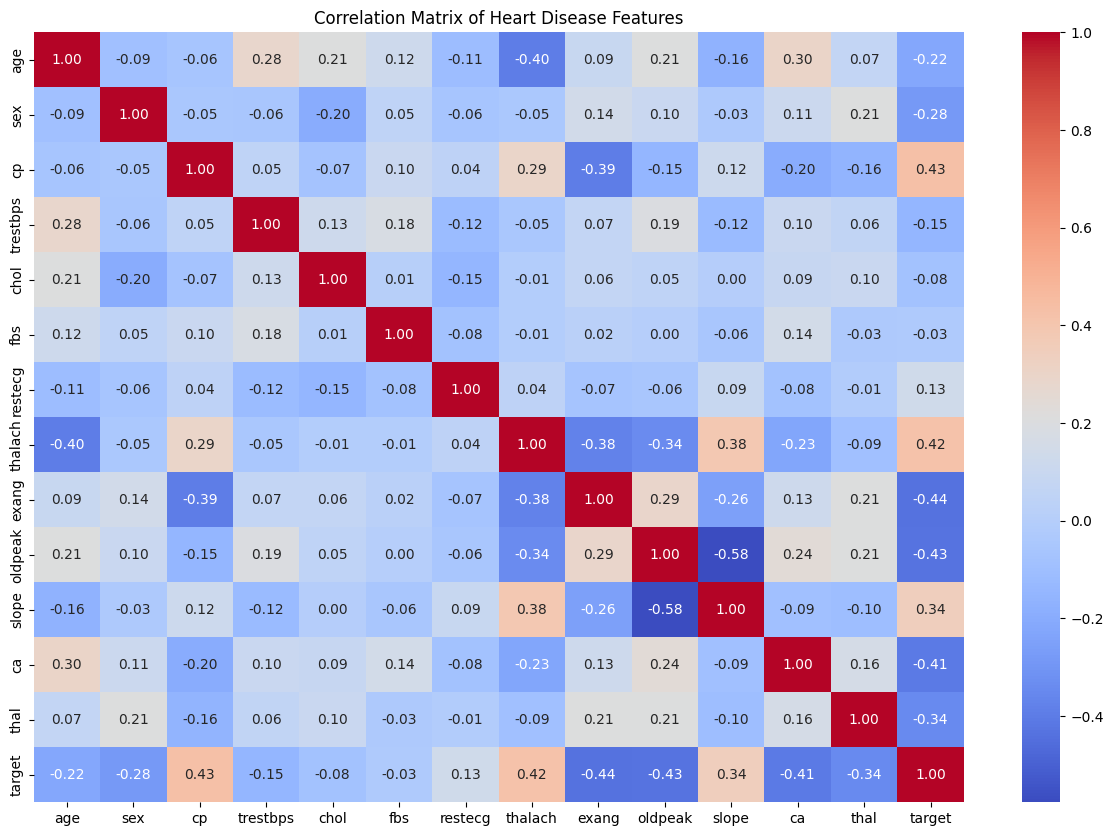

In [28]:
# Visualize relationships between features
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Features')

# C. Feature Selection:

# ONE-HOT ENCODING (Preparing Categorical Data)

Some of our columns have numbers that represent categories, not actual values.
For example, 'cp' (chest pain type) has values 0, 1, 2, 3. These are just labels.
A model might mistakenly think 3 > 1, which is not true.
We use One-Hot Encoding. This creates new columns for each category
with a 1 or 0, telling the model if that category is present or not.



In [29]:
 # List the columns that are categorical
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [30]:
# Use pd.get_dummies to perform one-hot encoding
# `drop_first=True` is a good practice to avoid having redundant columns.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [31]:
df_encoded.shape # Check the shape after encoding

(302, 23)

In [32]:
df_encoded.head() # Display the first few rows of the encoded DataFrame

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# SPLIT DATA INTO TRAINING AND TESTING SETS

Training Set (80%): To teach/train our model.
Testing Set (20%): To see how well our model performs on new, unseen data.


In [34]:
# Define features and target variable
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# D. Model Building & Evaluation

In [35]:
# model call
model = LogisticRegression()

In [36]:
# train the model
model.fit(X_train, y_train)

c:\Users\osama\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# predict the values
y_pred = model.predict(X_test)

In [38]:
y_pred # Evaluate the model


array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

# EVALUATE THE MODEL'S PERFORMANCE

In [39]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred)) # Accuracy of the model
print('Recall Score: ', recall_score(y_test, y_pred)) # Recall of the model
print('Precision Score: ', precision_score(y_test, y_pred)) # Precision of the model
print('F1 Score: ', f1_score(y_test, y_pred)) # F1 Score of the model
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred)) # Confusion Matrix of the model
print('Classification Report: \n', classification_report(y_test, y_pred)) # Classification Report of the model

Accuracy Score:  0.7868852459016393
Recall Score:  0.8620689655172413
Precision Score:  0.7352941176470589
F1 Score:  0.7936507936507936
Confusion Matrix: 
 [[23  9]
 [ 4 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



# confusion matrix

Text(70.72222222222221, 0.5, 'Actual')

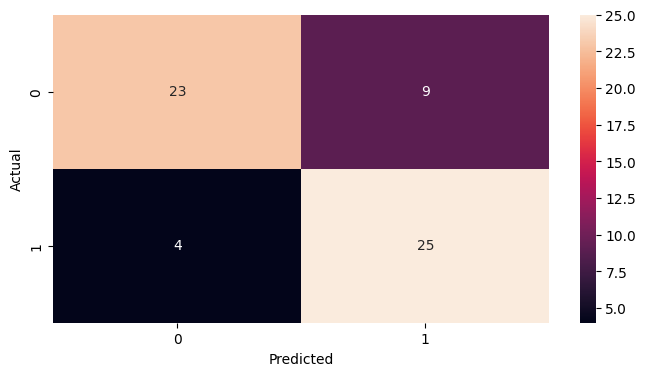

In [40]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Decision Tree Algorithm

# Training the  DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

# create and train teh model with pred
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [43]:
# predict the model
y_pred = model.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix of the model
print(classification_report(y_test, y_pred)) # Classification Report of the model

[[18 14]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        32
           1       0.62      0.79      0.70        29

    accuracy                           0.67        61
   macro avg       0.69      0.68      0.67        61
weighted avg       0.69      0.67      0.67        61



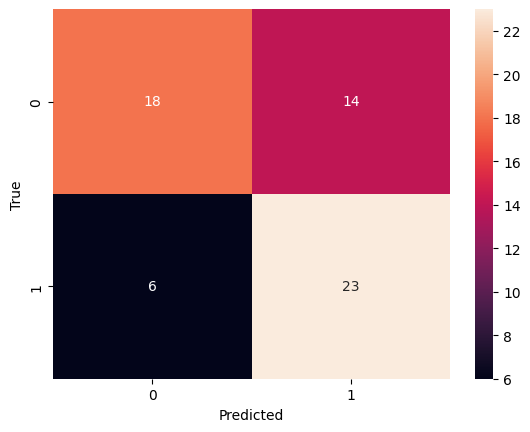

In [44]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Convert into HTML, open the HTML file in a browser and print to PDF


In [47]:
# Code to save this notebook as PDF
import subprocess
import os

def save_notebook_as_pdf():
    """
    Save the current notebook as PDF using nbconvert
    """
    try:
        # Get the current notebook path
        notebook_path = "Decision Tree.ipynb"
        
        # Method 1: Using nbconvert command line
        print("Attempting to save notebook as PDF...")
        
        # Install required packages if not available
        subprocess.run(["pip", "install", "nbconvert[webpdf]"], check=True)
        
        # Convert notebook to PDF
        result = subprocess.run([
            "jupyter", "nbconvert", 
            "--to", "pdf", 
            notebook_path
        ], capture_output=True, text=True)
        
        if result.returncode == 0:
            print(f"✅ Successfully saved as 'Decision Tree.pdf'")
        else:
            print(f"❌ Error: {result.stderr}")
            
            # Alternative method using HTML first
            print("Trying alternative method: Converting to HTML first...")
            
            # Convert to HTML
            html_result = subprocess.run([
                "jupyter", "nbconvert", 
                "--to", "html", 
                notebook_path
            ], capture_output=True, text=True)
            
            if html_result.returncode == 0:
                print("✅ Successfully saved as 'Decision Tree.html'")
                print("You can open the HTML file in a browser and print to PDF")
            else:
                print(f"❌ HTML conversion also failed: {html_result.stderr}")
                
    except Exception as e:
        print(f"❌ Error occurred: {str(e)}")
        print("\n📋 Manual steps to save as PDF:")
        print("1. Go to File > Print Preview in VS Code")
        print("2. Or use: File > Export > Export as PDF")
        print("3. Or convert to HTML first: jupyter nbconvert --to html 'Decision Tree.ipynb'")

# Run the function
save_notebook_as_pdf()

Attempting to save notebook as PDF...
❌ Error: [NbConvertApp] Converting notebook Decision Tree.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'Decision Tree.ipynb'
Traceback (most recent call last):
  File "C:\Users\osama\miniconda3\envs\python_ml\Lib\site-packages\nbconvert\nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        notebook_filename, resources=resources
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\osama\miniconda3\envs\python_ml\Lib\site-packages\nbconvert\exporters\templateexporter.py", line 390, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\osama\miniconda3\envs\python_ml\Lib\site-packages\nbconvert\exporters\exporter.py", line 201, in from_filename
    return self.from_file(f, res